In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка визуализации
sns.set(style="whitegrid")


In [5]:
df = pd.read_csv('/Users/liker/Downloads/students_simple.csv')
df.head()


,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


In [6]:
columns_to_plot = ['height', 'age']
df_selected = df[columns_to_plot]
df_selected.head()


,height,age
0,159,20
1,160,25
2,161,28
3,162,19
4,162,23


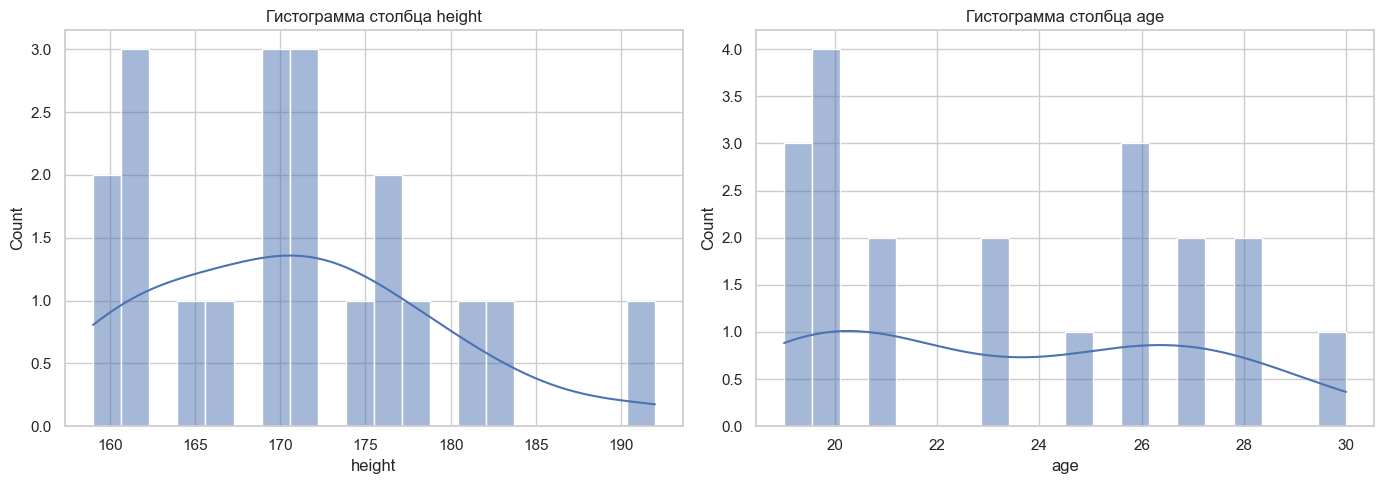

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(columns_to_plot):
    sns.histplot(df_selected[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Гистограмма столбца {col}')

plt.tight_layout()
plt.show()

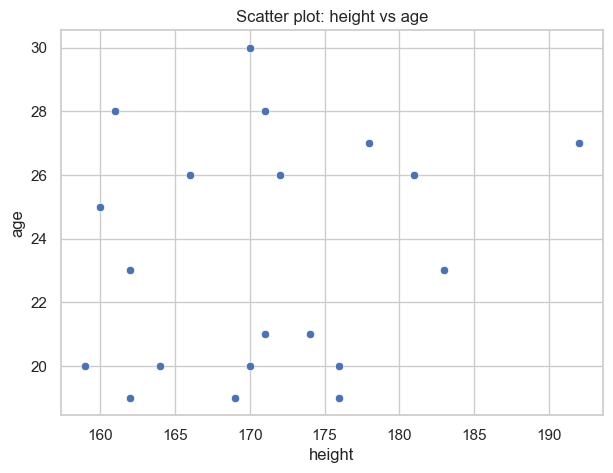

In [8]:
# Построение scatter plot между двумя столбцами
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_selected, x=columns_to_plot[0], y=columns_to_plot[1])
plt.title(f'Scatter plot: {columns_to_plot[0]} vs {columns_to_plot[1]}')
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.show()


In [9]:
# Расчет корреляции Фехнера (корреляции по ранговым данным)
from scipy.stats import rankdata

# Преобразуем данные в ранги
ranked_data = df_selected.apply(rankdata)

# Рассчитаем корреляцию Пирсона на ранжированных данных
fechner_corr = ranked_data.corr(method='pearson')
print("Корреляция Фехнера между столбцами:")
print(fechner_corr)


Корреляция Фехнера между столбцами:
          height       age
height  1.000000  0.175023
age     0.175023  1.000000


In [10]:
import numpy as np
from scipy.stats import pearsonr, norm

# Выбираем два столбца
x = df_selected[columns_to_plot[0]]
y = df_selected[columns_to_plot[1]]

# Корреляция Пирсона + p-value
r, p_value = pearsonr(x, y)
print(f"Корреляция Пирсона между {columns_to_plot[0]} и {columns_to_plot[1]}: {r:.3f}, p-value: {p_value:.3f}")

# Доверительный интервал для r с использованием преобразования Фишера
n = len(x)
z = np.arctanh(r)  # преобразование Фишера
se = 1/np.sqrt(n-3)
z_crit = norm.ppf(0.975)  # для 95% доверительного интервала

z_lower = z - z_crit*se
z_upper = z + z_crit*se

r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

print(f"95% доверительный интервал для корреляции Пирсона: [{r_lower:.3f}, {r_upper:.3f}]")


Корреляция Пирсона между height и age: 0.194, p-value: 0.412
95% доверительный интервал для корреляции Пирсона: [-0.271, 0.586]


In [11]:
from scipy.stats import spearmanr

# Расчет корреляции Спирмена
r_s, p_value_s = spearmanr(df_selected[columns_to_plot[0]], df_selected[columns_to_plot[1]])
print(f"Корреляция Спирмена между {columns_to_plot[0]} и {columns_to_plot[1]}: {r_s:.3f}, p-value: {p_value_s:.3f}")


Корреляция Спирмена между height и age: 0.175, p-value: 0.460


In [12]:
from scipy.stats import kendalltau

# Расчет корреляции Кенделла
tau, p_value_tau = kendalltau(df_selected[columns_to_plot[0]], df_selected[columns_to_plot[1]])
print(f"Корреляция Кенделла между {columns_to_plot[0]} и {columns_to_plot[1]}: {tau:.3f}, p-value: {p_value_tau:.3f}")


Корреляция Кенделла между height и age: 0.122, p-value: 0.470


Уравнение регрессии: y = 0.082*x + 9.347


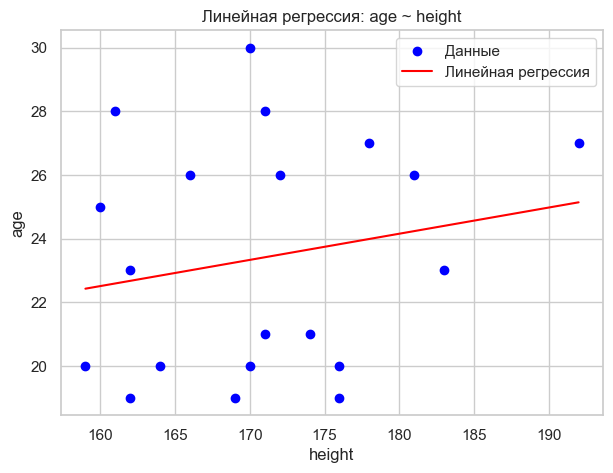

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Выбираем столбцы
x = df_selected[columns_to_plot[0]].values.reshape(-1, 1)  # независимая переменная
y = df_selected[columns_to_plot[1]].values  # зависимая переменная

# Создаем и обучаем модель
model = LinearRegression()
model.fit(x, y)

# Коэффициенты
w1 = model.coef_[0]   # наклон
w0 = model.intercept_  # смещение
print(f"Уравнение регрессии: y = {w1:.3f}*x + {w0:.3f}")

# Построение графика
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, model.predict(x), color='red', label='Линейная регрессия')
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.title(f'Линейная регрессия: {columns_to_plot[1]} ~ {columns_to_plot[0]}')
plt.legend()
plt.show()


Квадратичное уравнение регрессии: y = 0.005*x^2 + -1.771*x + 169.689


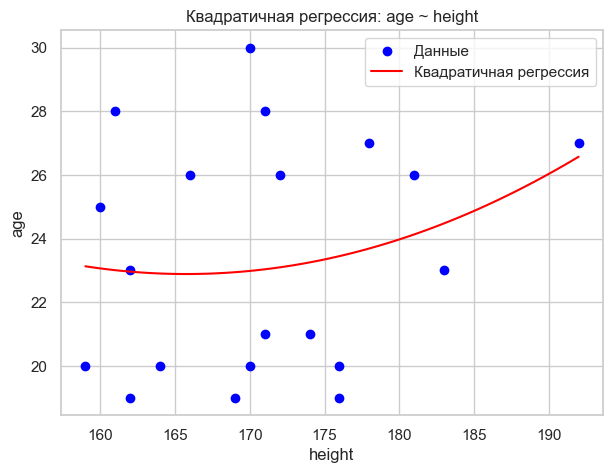

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Преобразуем x в квадратичную форму
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)  # создаёт [1, x, x^2]

# Обучаем модель линейной регрессии на квадратичных признаках
model_quad = LinearRegression()
model_quad.fit(x_poly, y)

# Коэффициенты
w0 = model_quad.intercept_
w1, w2 = model_quad.coef_[1], model_quad.coef_[2]
print(f"Квадратичное уравнение регрессии: y = {w2:.3f}*x^2 + {w1:.3f}*x + {w0:.3f}")

# Построение графика
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model_quad.predict(x_range_poly)

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label='Квадратичная регрессия')
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.title(f'Квадратичная регрессия: {columns_to_plot[1]} ~ {columns_to_plot[0]}')
plt.legend()
plt.show()


Гиперболическое уравнение регрессии: y = -1.992/x + 24.047


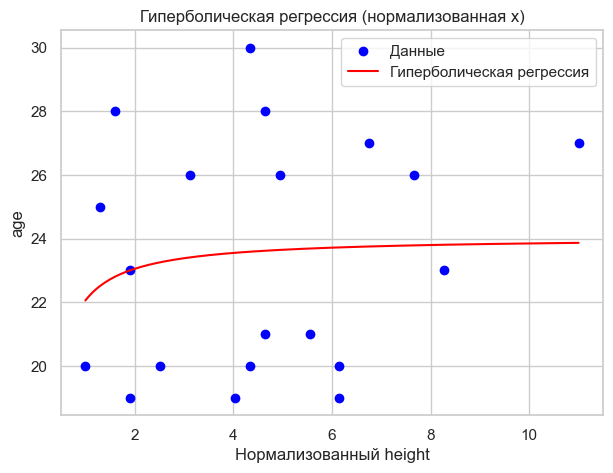

In [19]:
# Нормализация x для визуализации
x_min, x_max = x.min(), x.max()
x_norm = (x - x_min) / (x_max - x_min) * 10 + 1  # масштабируем в 1-11

# Обучаем гиперболическую модель
x_hyper = 1 / x_norm
model_hyper = LinearRegression()
model_hyper.fit(x_hyper, y)

w1 = model_hyper.coef_[0]
w0 = model_hyper.intercept_
print(f"Гиперболическое уравнение регрессии: y = {w1:.3f}/x + {w0:.3f}")

# График
x_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_pred = model_hyper.predict(1 / x_range)

plt.figure(figsize=(7,5))
plt.scatter(x_norm, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label='Гиперболическая регрессия')
plt.xlabel(f'Нормализованный {columns_to_plot[0]}')
plt.ylabel(columns_to_plot[1])
plt.title('Гиперболическая регрессия (нормализованная x)')
plt.legend()
plt.show()



Показательное уравнение регрессии: y = 21.902 * exp(0.012 * x)


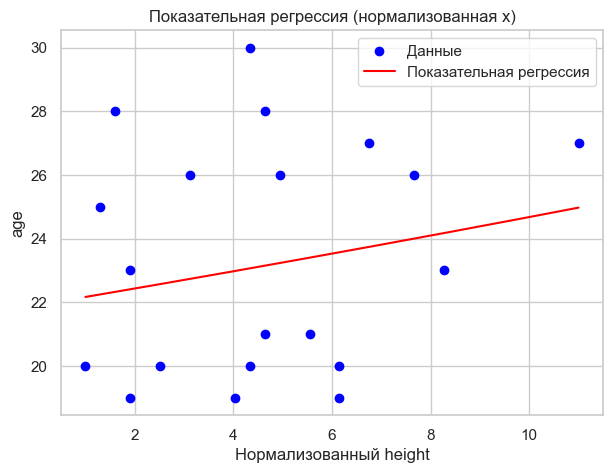

In [20]:
# Нормализация x для визуализации
x_norm = (x - x_min) / (x_max - x_min) * 10 + 1  # масштабируем в 1-11

# Логарифмируем y для обучения
y_log = np.log(y)
model_exp = LinearRegression()
model_exp.fit(x_norm, y_log)

w1 = model_exp.coef_[0]
w0 = np.exp(model_exp.intercept_)
print(f"Показательное уравнение регрессии: y = {w0:.3f} * exp({w1:.3f} * x)")

# Построение графика
x_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_pred = w0 * np.exp(w1 * x_range)

plt.figure(figsize=(7,5))
plt.scatter(x_norm, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label='Показательная регрессия')
plt.xlabel(f'Нормализованный {columns_to_plot[0]}')
plt.ylabel(columns_to_plot[1])
plt.title('Показательная регрессия (нормализованная x)')
plt.legend()
plt.show()



In [22]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Словарь для хранения результатов
results = {}

# 1. Линейная регрессия
X_lin = sm.add_constant(x)
model_lin = sm.OLS(y, X_lin).fit()
results['Линейная'] = {'F-статистика': model_lin.fvalue, 'p-value': model_lin.f_pvalue}

# 2. Квадратичная регрессия
poly = PolynomialFeatures(degree=2)
X_quad = poly.fit_transform(x)  # [1, x, x^2]
model_quad = sm.OLS(y, X_quad).fit()
results['Квадратичная'] = {'F-статистика': model_quad.fvalue, 'p-value': model_quad.f_pvalue}

# 3. Гиперболическая регрессия y = w1 / x + w0
X_hyper = sm.add_constant(1/x)
model_hyper = sm.OLS(y, X_hyper).fit()
results['Гиперболическая'] = {'F-статистика': model_hyper.fvalue, 'p-value': model_hyper.f_pvalue}

# 4. Показательная регрессия y = w0 * exp(w1*x)
y_log = np.log(y)  # ln(y) = ln(w0) + w1*x
X_exp = sm.add_constant(x)
model_exp = sm.OLS(y_log, X_exp).fit()
results['Показательная'] = {'F-статистика': model_exp.fvalue, 'p-value': model_exp.f_pvalue}

# Выводим результаты
print("F-тест для всех моделей:")
for name, metrics in results.items():
    print(f"{name}: F = {metrics['F-статистика']:.3f}, p-value = {metrics['p-value']:.3f}")


F-тест для всех моделей:
Линейная: F = 0.707, p-value = 0.412
Квадратичная: F = 0.503, p-value = 0.613
Гиперболическая: F = 0.647, p-value = 0.432
Показательная: F = 0.754, p-value = 0.397
